In [2]:
def spiral(e):
    import matplotlib.pyplot as plt
    import numpy as np
    # length of coords = 2/e+2
    coords = [[0,0], [1,0], [1,1], [0,1]]
    ns = [None]*int(2/e-2)
    coords.extend(ns)
    for i in range(4,len(coords)):
#         if i>=2/e+2:
#             coords=coords[:i]
#             plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
#             break
        if i%4==0:
            coords[i] = [coords[i-1][0],coords[i-4][1]+e]
        elif i%4==1:
            coords[i] = [coords[i-4][0]-e,coords[i-1][1]]
        elif i%4==2:
            coords[i] = [coords[i-1][0],coords[i-4][1]-e]
        else:
            coords[i] = [coords[i-4][0]+e,coords[i-1][1]]
    plt.plot([i[0] for i in coords],[i[1] for i in coords], '-o')
    return np.array([np.array(i) for i in coords])

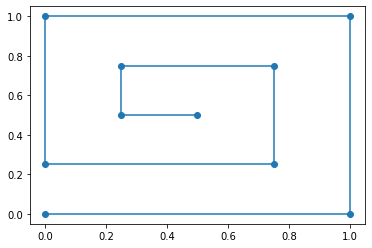

In [3]:
coords = spiral(e=1/4)

In [4]:
coords

array([[0.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 0.25],
       [0.75, 0.25],
       [0.75, 0.75],
       [0.25, 0.75],
       [0.25, 0.5 ],
       [0.5 , 0.5 ]])

In [18]:
my_string=''
for i in range(len([tuple(i) for i in coords])-1):
    my_string+='(j['
    my_string+=str(i)
    my_string+='], j['
    my_string+=str(i+1)
    my_string+=']), '
my_string[:-2]

'(j[0], j[1]), (j[1], j[2]), (j[2], j[3]), (j[3], j[4]), (j[4], j[5]), (j[5], j[6]), (j[6], j[7]), (j[7], j[8]), (j[8], j[9]), (j[9], j[10]), (j[10], j[11]), (j[11], j[12]), (j[12], j[13]), (j[13], j[14]), (j[14], j[15]), (j[15], j[16]), (j[16], j[17]), (j[17], j[18]), (j[18], j[19]), (j[19], j[20]), (j[20], j[21]), (j[21], j[22]), (j[22], j[23]), (j[23], j[24]), (j[24], j[25]), (j[25], j[26]), (j[26], j[27]), (j[27], j[28]), (j[28], j[29]), (j[29], j[30]), (j[30], j[31]), (j[31], j[32]), (j[32], j[33])'

In [16]:
[tuple(i) for i in coords]

[(0.0, 0.0),
 (1.0, 0.0),
 (1.0, 1.0),
 (0.0, 1.0),
 (0.0, 0.0625),
 (0.9375, 0.0625),
 (0.9375, 0.9375),
 (0.0625, 0.9375),
 (0.0625, 0.125),
 (0.875, 0.125),
 (0.875, 0.875),
 (0.125, 0.875),
 (0.125, 0.1875),
 (0.8125, 0.1875),
 (0.8125, 0.8125),
 (0.1875, 0.8125),
 (0.1875, 0.25),
 (0.75, 0.25),
 (0.75, 0.75),
 (0.25, 0.75),
 (0.25, 0.3125),
 (0.6875, 0.3125),
 (0.6875, 0.6875),
 (0.3125, 0.6875),
 (0.3125, 0.375),
 (0.625, 0.375),
 (0.625, 0.625),
 (0.375, 0.625),
 (0.375, 0.4375),
 (0.5625, 0.4375),
 (0.5625, 0.5625),
 (0.4375, 0.5625),
 (0.4375, 0.5),
 (0.5, 0.5)]

In [17]:
len([tuple(i) for i in coords])

34

10


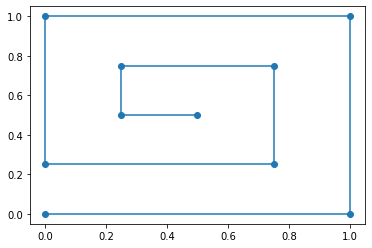

In [9]:
coords = spiral(e=1/4)
print(len(coords))

In [10]:
import numpy as np
# eq=0
# ineq=0
e=1/4
length = len(coords)
dummy = int((2/e+1)/e)
# dummy = length-1
print(length,dummy)
ct=0
A=[]
for i in range(len(coords)):
    for j in range(i+1,len(coords)):
        row=[0]*(2*length+dummy)
        row[i*2]   = coords[i][0]-coords[j][0]
        row[i*2+1] = coords[i][1]-coords[j][1]
        row[j*2]   = coords[j][0]-coords[i][0]
        row[j*2+1]   = coords[j][1]-coords[i][1]
        if j-i==1:
#             print(f'{i} and {j} are connected by an edge')
#             print(f'(v{i}-v{j})(p{i}-p{j})=0')
#             eq+=1
            row[2*length+ct]=1
#             print(2*length+ct)
            ct+=1
        else:
#             print(f'{i} and {j} are NOT connected by an edge')
#             print(f'(v{i}-v{j})(p{i}-p{j})>0')
#             ineq+=1
            pass
#         print(row)
        A.append(row)
A = np.array(A)

10 36


In [61]:
print(A)

[[-1.  0.  1. ...  0.  0.  0.]
 [-1. -1.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [ ]:
# coords=np.array([np.array(i) for i in coords])
# coords[2]@coords[8]

In [50]:
coords[8], coords[4]

(array([0.25, 0.5 ]), array([0.  , 0.25]))

In [55]:
def fun(x,e=1/4,p=coords):
    import math
    x=x[:-int((2/e+1)/e)]
    part1 = sum([i**2 for i in x])
    part2 = 0
    for i in range(len(p)):
        for j in range(i+1, len(p)):
            if j-i!=1:
                vi = np.array([x[i*2], x[i*2+1]])
                vj = np.array([x[j*2], x[j*2+1]])
                den = (vi-vj)@(p[i]-p[j])-math.sqrt(sum([k**2 for k in p[j]-p[i]]))
#                 if den==0:
#                     print(j,i,vi,vj,p[j]-p[i],(vi-vj)@(p[i]-p[j]), math.sqrt(sum([k**2 for k in p[j]-p[i]])))
                part2+=1/den
    return part1+part2

In [57]:
import scipy, random
from scipy import optimize
constraint=scipy.optimize.LinearConstraint(A, np.zeros(45), np.zeros(45), keep_feasible=False)
# x0=[random.uniform(0, 1) for _ in range(56)]
x0=np.zeros(56)
m='SLSQP' #'Nelder-Mead'

result = scipy.optimize.minimize(fun, x0, method=m, constraints=constraint)

In [59]:
result.success

False

In [45]:
x0

[0.8776790066699018,
 0.6131040452346279,
 0.49962955591952796,
 0.21520939237065628,
 0.36773791073491324,
 0.09705666988866812,
 0.045400840652959906,
 0.13554121411335374,
 0.5223851000079575,
 0.01587921305169948,
 0.9889892554378894,
 0.43499353020455334,
 0.7554653811128478,
 0.35219154226763405,
 0.3489558263057828,
 0.9095567212612203,
 0.8776333462386892,
 0.43919493034516677,
 0.7736467135269638,
 0.04890350042505032,
 0.6673046745909123,
 0.732994322184009,
 0.3105453531636866,
 0.40452439992255795,
 0.7062821769749754,
 0.5060672806515862,
 0.6334857303833465,
 0.7622993087458563,
 0.49242614145902763,
 0.9435520841114945,
 0.24556522824223526,
 0.41093768331235303,
 0.6745421004865718,
 0.8679683633308581,
 0.13605810384060257,
 0.5785750996206492,
 0.5946535423770601,
 0.9181674071186026,
 0.08251935945400546,
 0.43655921128658004,
 0.3612340031181712,
 0.7627568652819398,
 0.06278123210574449,
 0.8598533494138901,
 0.440846819110146,
 0.7681904002508118,
 0.5054770776675